<a href="https://colab.research.google.com/github/umarzaib1/Heart-Stroke-Prediction-with-Logistic-Regression-and-Gradient-Boosting-Classifier-/blob/main/Heart_Stroke_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Details

Here is a step-by-step plan to build and deploy a stroke prediction model:

1.  **Load Data**: Load the stroke prediction dataset.
2.  **Explore Data**: Perform initial data exploration to understand the dataset structure, identify missing values, and analyze basic statistics.
3.  **Clean Data**: Handle missing values, outliers, and inconsistencies in the data.
4.  **Process Data**: Encode categorical variables, scale numerical features, and split the data into training and testing sets.
5.  **Analyze and Visualize Data**: Explore the relationships between features and the target variable (stroke) using visualizations and statistical analysis. Identify important features.
6.  **Build Model**: Choose a suitable model (e.g., Logistic Regression, Random Forest, Gradient Boosting) and train it on the training data.
7.  **Validate Model**: Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC) on the testing data. Perform cross-validation for robust evaluation.
8.  **Tune Model**: Optimize model hyperparameters to improve performance.
9. **Finish task**: Summarize the findings, the model's performance, and the deployment strategy.

## Task 1: Load Data

Load the stroke prediction dataset into a pandas DataFrame.

In [ ]:
import pandas as pd

data = pd.read_csv('Heart_stroke.csv')

In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Task 2: Explore Data

Perform initial data exploration to understand the dataset structure, identify missing values, and analyze basic statistics.

In [ ]:
data.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
bmi_groups = data.groupby(['age','gender'])['bmi'] # group the data by age and gender and took the bmi column
data['bmi'] = bmi_groups.transform(lambda x: x.fillna(x.mean())) # filled na in bmi with means of respective age and gender


In [ ]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True) # filled rest of na values left in bmi after above process

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Task 3: Clean Data

Handle missing values, outliers, and inconsistencies in the data.

In [ ]:
data.duplicated(subset=['id']).sum() # duplicates based on id column to check for reappeared entries
data.duplicated().sum() # duplictes in the whole dataset which in this case is 0

np.int64(0)

## Outliers befor Handling


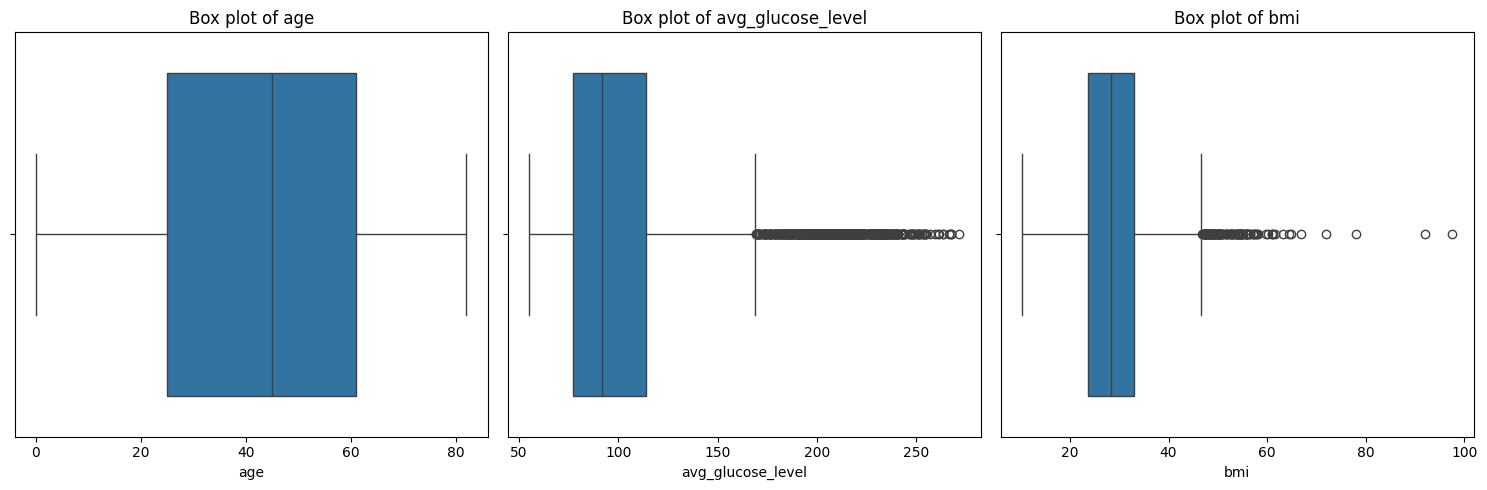

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'avg_glucose_level', 'bmi'] # Define a list of numerical column names to be visualized

plt.figure(figsize=(15, 5)) # Create a new figure for plotting with a specified size (width=15, height=5)

# Loop through each numerical column to create a box plot
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1) # Create a subplot within the figure. It creates a grid of 1 row and 3 columns, and selects the (i+1)-th subplot.
    sns.boxplot(x=data[col]) # Generate a box plot for the current column 'col' from the 'data' DataFrame
    plt.title(f'Box plot of {col}') # Set the title of the current subplot to indicate the column being plotted

plt.tight_layout() # Adjust the spacing between subplots to prevent titles and labels from overlapping
plt.show() # Display the generated plots

Let's look at each box plot:

*   **Box plot of age:** This box plot shows the distribution of ages in the dataset. The box represents the interquartile range (IQR), with the line inside indicating the median age. The "whiskers" extend to show the range of the data, excluding outliers. Any points beyond the whiskers are considered potential outliers. In this plot, the age distribution appears relatively symmetric, and there don't seem to be significant outliers.

*   **Box plot of avg\_glucose\_level:** This box plot displays the distribution of average glucose levels. You can see that while the majority of the data is concentrated in a certain range (represented by the box and whiskers), there are many individual data points plotted far above the upper whisker. These points represent individuals with unusually high average glucose levels and are considered outliers.

*   **Box plot of bmi:** This box plot shows the distribution of Body Mass Index (BMI). Similar to the average glucose level, the BMI box plot shows a concentration of data within a range, but also has several points extending above the upper whisker. These points represent individuals with unusually high BMI values and are considered outliers.

These box plots help us visually identify features that have a wide range of values or contain potential outliers that might need further investigation or handling during the data cleaning and processing stages.

## Handling Outliers

In [ ]:
def handle_outliers_iqr(df, column):
    """
    Handles outliers in a numerical column using the IQR method by capping values.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to handle outliers for.

    Returns:
        pd.DataFrame: The DataFrame with outliers handled in the specified column.
    """
    # Calculate the first quartile (25th percentile)
    Q1 = df[column].quantile(0.25)
    # Calculate the third quartile (75th percentile)
    Q3 = df[column].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the lower bound for outlier detection (Q1 - 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound for outlier detection (Q3 + 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values in the column: values below the lower bound are set to the lower bound,
    # and values above the upper bound are set to the upper bound.
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [ ]:
# Apply the outlier handling function to the 'avg_glucose_level' and 'bmi' columns
data = handle_outliers_iqr(data, 'avg_glucose_level')
data = handle_outliers_iqr(data, 'bmi')

print("Outliers handled for 'avg_glucose_level' and 'bmi' using IQR capping.")

Outliers handled for 'avg_glucose_level' and 'bmi' using IQR capping.


## Outliers after Handling

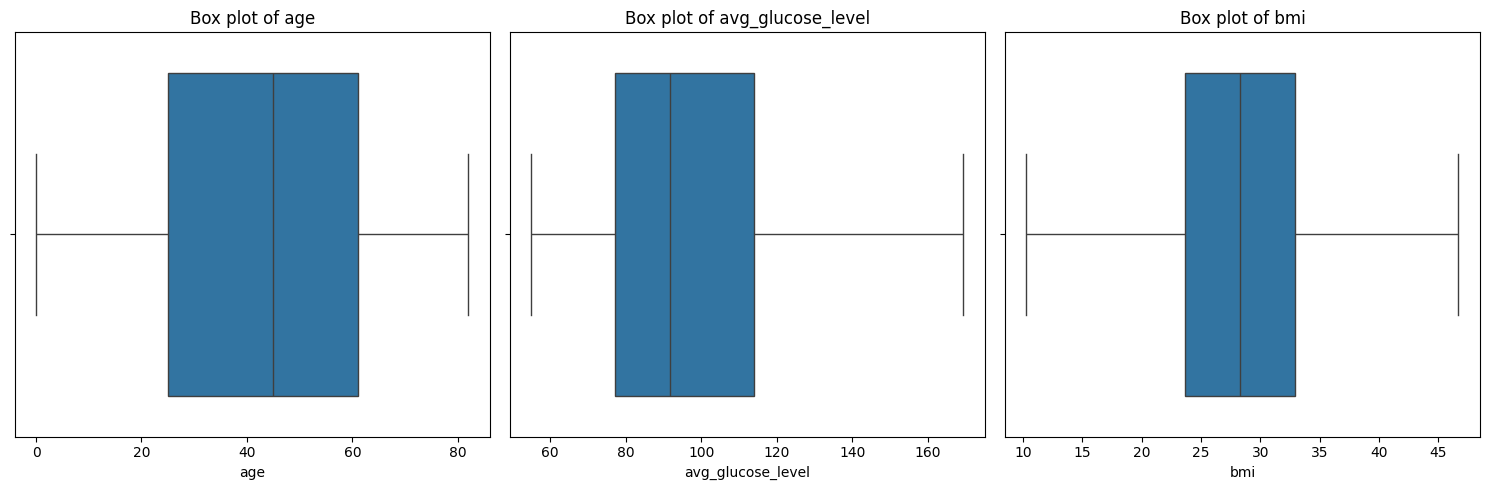

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'avg_glucose_level', 'bmi'] # Define a list of numerical column names to be visualized

plt.figure(figsize=(15, 5)) # Create a new figure for plotting with a specified size (width=15, height=5)

# Loop through each numerical column to create a box plot
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1) # Create a subplot within the figure. It creates a grid of 1 row and 3 columns, and selects the (i+1)-th subplot.
    sns.boxplot(x=data[col]) # Generate a box plot for the current column 'col' from the 'data' DataFrame
    plt.title(f'Box plot of {col}') # Set the title of the current subplot to indicate the column being plotted

plt.tight_layout() # Adjust the spacing between subplots to prevent titles and labels from overlapping
plt.show() # Display the generated plots

## Looking for inconsistencies

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("-" * 30)

## Task 4: Analyze and Visualize Data

Explore the relationships between features and the target variable (stroke) using visualizations and statistical analysis. Identify important features.

/tmp/ipython-input-3123759011.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke_counts = data.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)


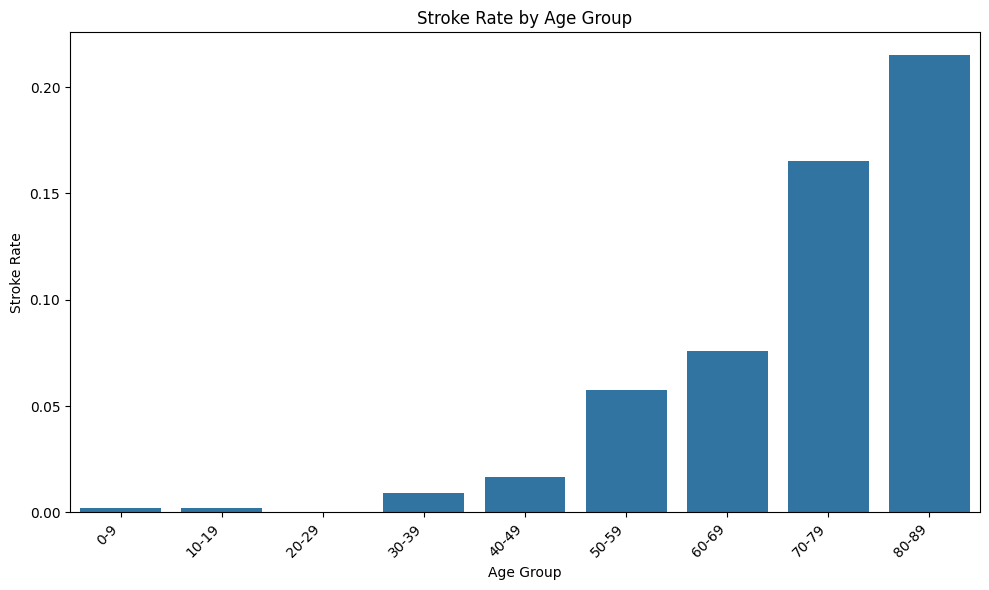

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define age bins and labels
# We are creating intervals for age: 0-10, 11-20, ..., 81-90
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]] # Create labels like '0-9', '10-19', etc.

# Create a new column 'age_group' by binning the 'age' column
# The include_lowest=True ensures that the lowest value (0) is included in the first bin.
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Calculate the number of stroke cases and total cases in each age group
# Group by 'age_group' and 'stroke', then count the occurrences
age_stroke_counts = data.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)

# Calculate the stroke rate for each age group
# Stroke rate = (Number of stroke cases) / (Total cases in age group)
age_stroke_counts['Total'] = age_stroke_counts[0] + age_stroke_counts[1] # Calculate total cases in each group
age_stroke_counts['Stroke_Rate'] = age_stroke_counts[1] / age_stroke_counts['Total'] # Calculate the stroke rate

# Create a bar plot to visualize the stroke rate by age group
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
sns.barplot(x=age_stroke_counts.index, y=age_stroke_counts['Stroke_Rate']) # Create a bar plot with age groups on x-axis and stroke rate on y-axis
plt.title('Stroke Rate by Age Group') # Set the title of the plot
plt.xlabel('Age Group') # Set the label for the x-axis
plt.ylabel('Stroke Rate') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

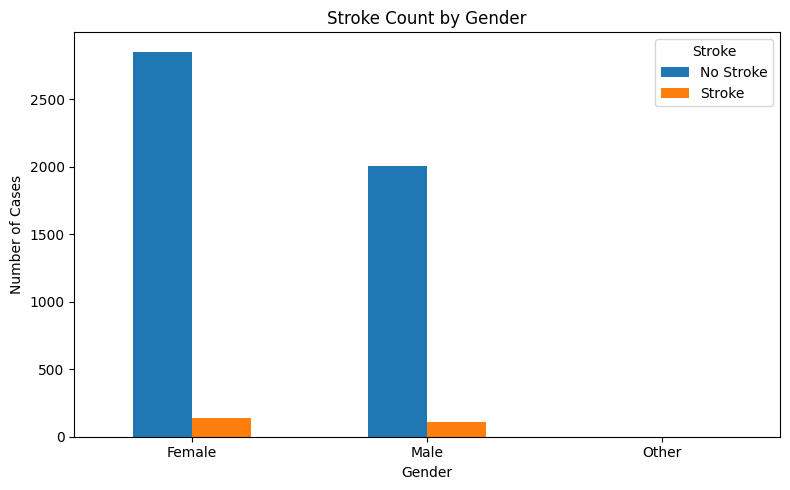

In [ ]:
# Calculate the number of stroke cases for each gender
# Group the data by 'gender' and 'stroke', then count the occurrences in each group
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack(fill_value=0)

# Create a bar plot to visualize the stroke counts by gender and stroke status
# The 'unstack()' operation creates columns for stroke status (0 and 1), allowing seaborn to plot them as separate bars.
gender_stroke_counts.plot(kind='bar', stacked=False, figsize=(8, 5)) # Create a bar plot. stacked=False shows bars side-by-side.
plt.title('Stroke Count by Gender') # Set the title of the plot
plt.xlabel('Gender') # Set the label for the x-axis
plt.ylabel('Number of Cases') # Set the label for the y-axis
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke']) # Add a legend to explain the bars (0: No Stroke, 1: Stroke)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

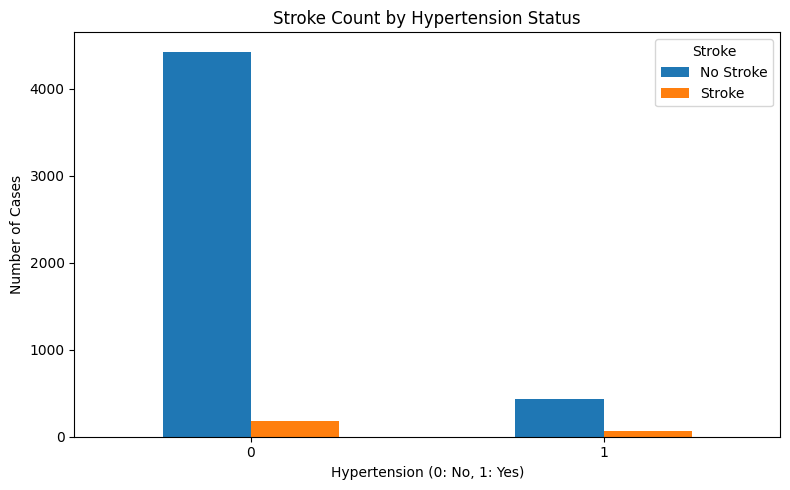

In [ ]:
# Calculate the number of stroke cases for each hypertension status
# Group the data by 'hypertension' and 'stroke', then count the occurrences in each group
hypertension_stroke_counts = data.groupby(['hypertension', 'stroke']).size().unstack(fill_value=0)

# Create a bar plot to visualize the stroke counts by hypertension status and stroke status
# The 'unstack()' operation creates columns for stroke status (0 and 1).
hypertension_stroke_counts.plot(kind='bar', stacked=False, figsize=(8, 5)) # Create a bar plot. stacked=False shows bars side-by-side.
plt.title('Stroke Count by Hypertension Status') # Set the title of the plot
plt.xlabel('Hypertension (0: No, 1: Yes)') # Set the label for the x-axis
plt.ylabel('Number of Cases') # Set the label for the y-axis
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke']) # Add a legend to explain the bars (0: No Stroke, 1: Stroke)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

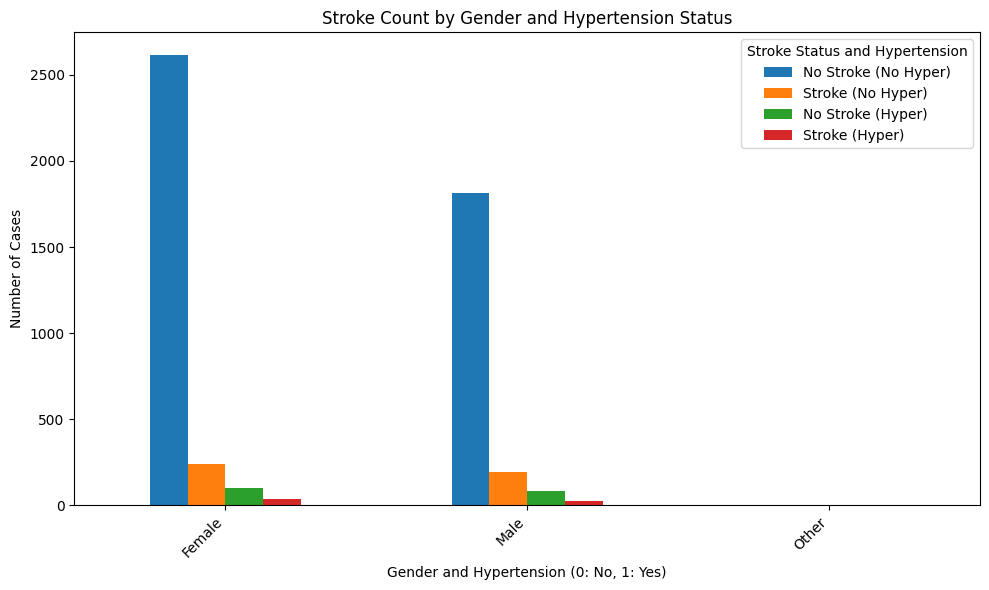

In [ ]:
# Group data by gender, hypertension, and stroke and count occurrences
gender_hypertension_stroke_counts = data.groupby(['gender', 'hypertension', 'stroke']).size().unstack(fill_value=0)

# Unstack the stroke levels to have them as columns for plotting
gender_hypertension_stroke_counts = gender_hypertension_stroke_counts.unstack(level='hypertension', fill_value=0)

# Plotting
gender_hypertension_stroke_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Stroke Count by Gender and Hypertension Status')
plt.xlabel('Gender and Hypertension (0: No, 1: Yes)')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stroke Status and Hypertension', labels=[
    'No Stroke (No Hyper)', 'Stroke (No Hyper)',
    'No Stroke (Hyper)', 'Stroke (Hyper)'
])
plt.tight_layout()
plt.show()

## Task 5: Process Data

Encode categorical variables, scale numerical features, and split the data into training and testing sets.

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler for standardization

def scale_numerical_features(df, numerical_cols, scaler=None):
    """
    Scales numerical columns in a DataFrame using StandardScaler.

    Args:
        df (pd.DataFrame): The input DataFrame.
        numerical_cols (list): A list of numerical column names to scale.
        scaler (StandardScaler, optional): An existing StandardScaler object to use for transforming.
                                           If None, a new scaler is fitted to the data.

    Returns:
        tuple: A tuple containing the DataFrame with scaled numerical columns
               and the fitted StandardScaler object (if scaler was None).
    """
    if scaler is None:
        # Initialize and fit the StandardScaler if no scaler is provided
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
        return df, scaler
    else:
        # Use the provided scaler to transform the data
        df[numerical_cols] = scaler.transform(df[numerical_cols])
        return df, scaler

# Select the numerical columns to scale
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Apply standardization using the function and store the scaler
data_scaled, scaler = scale_numerical_features(data_encoded.copy(), numerical_cols) # Use a copy and get the fitted scaler

# Display the first few rows of the scaled DataFrame to see the changes
print("First 5 rows of the scaled data:")
display(data_scaled.head())

In [ ]:
def encode_categorical_features(df, categorical_cols):
    """
    Applies one-hot encoding to specified categorical columns in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        categorical_cols (list): A list of column names to encode.

    Returns:
        pd.DataFrame: The DataFrame with categorical columns one-hot encoded.
    """
    # Apply one-hot encoding to the categorical columns
    # get_dummies converts categorical variables into dummy/indicator variables.
    # prefix is added to column names.
    # drop_first=True is used to avoid multicollinearity by dropping the first category of each feature.
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df_encoded

# Select the categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Apply one-hot encoding using the function
data_encoded = encode_categorical_features(data.copy(), categorical_cols) # Use a copy to avoid modifying the original data

# Display the first few rows of the encoded DataFrame to see the changes
print("Original data shape:", data.shape)
print("Encoded data shape:", data_encoded.shape)
print("\nFirst 5 rows of the encoded data:")
display(data_encoded.head())

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data

# Define features (X) and target variable (y)
# X will be all columns except 'stroke' and 'id' (as 'id' is not a predictive feature)
# y will be the 'stroke' column
X = data_scaled.drop(['stroke', 'id'], axis=1)
y = data_scaled['stroke']

# Split the data into training and testing sets
# test_size=0.20 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split.
# stratify=y is important for imbalanced datasets (like this one, with fewer stroke cases).
# It ensures that the proportion of stroke cases is the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4088, 16)
Shape of X_test: (1022, 16)
Shape of y_train: (4088,)
Shape of y_test: (1022,)


## Task 6: Build Model


In [ ]:
from sklearn.linear_model import LogisticRegression # Import the Logistic Regression model
from sklearn.ensemble import GradientBoostingClassifier # Import the Gradient Boosting Classifier model

# Initialize the Logistic Regression model
# We set a random_state for reproducibility
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model using the training data
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

# Initialize the Gradient Boosting Classifier model
# We set a random_state for reproducibility
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the GBM model using the training data
gbm_model.fit(X_train, y_train)

print("Gradient Boosting Machine model trained successfully.")

Logistic Regression model trained successfully.
Gradient Boosting Machine model trained successfully.


## Task 7: Validate Model

Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC) on the testing data. Perform cross-validation for robust evaluation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import evaluation metrics

# --- Evaluate Logistic Regression Model ---

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1] # Get probabilities for AUC

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"AUC: {auc_lr:.4f}")
print("-" * 30)

# --- Evaluate Gradient Boosting Machine Model ---

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)
y_proba_gbm = gbm_model.predict_proba(X_test)[:, 1] # Get probabilities for AUC

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
auc_gbm = roc_auc_score(y_test, y_proba_gbm)

print("--- Gradient Boosting Machine Model Evaluation ---")
print(f"Accuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1-Score: {f1_gbm:.4f}")
print(f"AUC: {auc_gbm:.4f}")
print("-" * 30)

--- Logistic Regression Model Evaluation ---
Accuracy: 0.9511
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.8429
------------------------------
--- Gradient Boosting Machine Model Evaluation ---
Accuracy: 0.9472
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.8336
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Task 8: Tune Model

Optimize model hyperparameters to improve performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1], # Step size shrinkage
    'max_depth': [3, 5]         # Maximum depth of the individual estimators
}

# Initialize the Gradient Boosting Classifier model
gbm = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
# estimator: The model to tune
# param_grid: The parameters to search over
# cv: Number of cross-validation folds
# scoring: Metric to optimize (e.g., 'recall' or 'f1' are good for imbalanced data)
# n_jobs: Number of CPU cores to use (-1 means all available)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting Grid Search for Gradient Boosting Machine...")
grid_search.fit(X_train, y_train)

print("\nGrid Search complete.")
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score found: ", grid_search.best_score_)

# Get the best model from the grid search
best_gbm_model = grid_search.best_estimator_

Starting Grid Search for Gradient Boosting Machine...

Grid Search complete.
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best F1-score found:  0.10438456174890283


## Evaluation GBC after tuning



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import evaluation metrics

# --- Evaluate Best Gradient Boosting Machine Model ---

# Make predictions on the test set using the best model
y_pred_best_gbm = best_gbm_model.predict(X_test)
y_proba_best_gbm = best_gbm_model.predict_proba(X_test)[:, 1] # Get probabilities for AUC

# Calculate evaluation metrics
accuracy_best_gbm = accuracy_score(y_test, y_pred_best_gbm)
precision_best_gbm = precision_score(y_test, y_pred_best_gbm)
recall_best_gbm = recall_score(y_test, y_pred_best_gbm)
f1_best_gbm = f1_score(y_test, y_pred_best_gbm)
auc_best_gbm = roc_auc_score(y_test, y_proba_best_gbm)

print("--- Best Gradient Boosting Machine Model Evaluation (on Test Set) ---")
print(f"Accuracy: {accuracy_best_gbm:.4f}")
print(f"Precision: {precision_best_gbm:.4f}")
print(f"Recall: {recall_best_gbm:.4f}")
print(f"F1-Score: {f1_best_gbm:.4f}")
print(f"AUC: {auc_best_gbm:.4f}")
print("-" * 30)

--- Best Gradient Boosting Machine Model Evaluation (on Test Set) ---
Accuracy: 0.9432
Precision: 0.1667
Recall: 0.0400
F1-Score: 0.0645
AUC: 0.7907
------------------------------
